In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/6th sem project"


'model (1).h5'					        test_essays.csv
 model_draft2.h5				        train_essays.csv
'new_approach_using_bert_and_vectorization (1).ipynb'   train_prompts.csv
 subtaskA_train_monolingual.jsonl		        train_v2_drcat_02.csv


In [3]:
!cp "/content/drive/My Drive/6th sem project/train_essays.csv" "train_essays.csv"
!cp "/content/drive/My Drive/6th sem project/test_essays.csv" "test_essays.csv"
!cp "/content/drive/My Drive/6th sem project/train_prompts.csv" "train_prompts.csv"
!cp "/content/drive/My Drive/6th sem project/train_v2_drcat_02.csv" "train_v2_drcat_02.csv"
!cp "/content/drive/My Drive/6th sem project/subtaskA_train_monolingual.jsonl" "subtaskA_train_monolingual.jsonl"

In [4]:
pip install tensorflow-text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found exi

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re
import tensorflow_text as tf_text
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras import Model, Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split


In [7]:
train_essays=pd.read_json("subtaskA_train_monolingual.jsonl",lines=True)
train_essays = pd.concat([train_essays.head(1000), train_essays.tail(1000)])
# train_essays=train_essays[['text','label']]
train_essays

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4
...,...,...,...,...,...
119752,"The paper is an interesting contribution, prim...",0,human,peerread,119752
119753,\nWe thank the reviewers for all their comment...,0,human,peerread,119753
119754,The authors introduce a semi-supervised method...,0,human,peerread,119754
119755,This paper proposes the Neural Graph Machine t...,0,human,peerread,119755


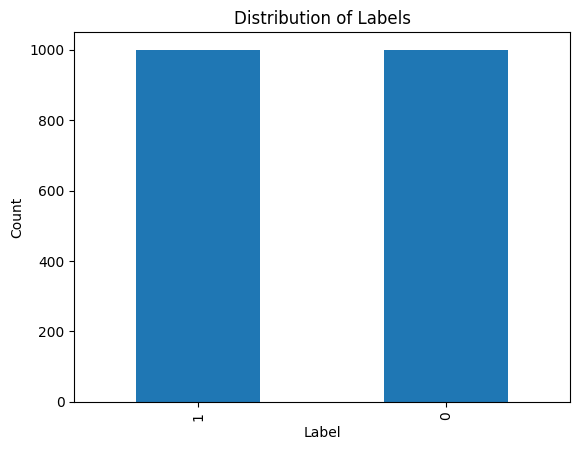

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = train_essays['label'].value_counts()

# Plot the bar graph
label_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()


In [9]:
!pip install nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#bert-bidirectional encoder representation from transformers


In [11]:

# Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

train_essays['clean_text'] = train_essays['text'].apply(clean_text)

In [12]:
print(train_essays['clean_text'])

0         forza motorsport popular racing game provides ...
1         buying virtual console games nintendo wii fun ...
2         windows nt popular operating system back day s...
3         make perfume perfume great way enhance persona...
4         convert song lyrics song converting song lyric...
                                ...                        
119752    paper interesting contribution primarily gener...
119753    thank reviewers comments however would like re...
119754    authors introduce semisupervised method neural...
119755    paper proposes neural graph machine adds graph...
119756    paper proposes model aims learning label nodes...
Name: clean_text, Length: 2000, dtype: object


In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_essays['clean_text'], train_essays['label'], test_size=0.2, random_state=42)


In [14]:
from transformers import DebertaForSequenceClassification, DebertaTokenizer

In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, padding=True, truncation=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [16]:
encoded_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')#list of string bna deta hai toList
encoded_val = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors='pt')


In [17]:
# Convert labels to tensors
train_labels = torch.tensor(y_train.values)#tensors are just like numPy arrays but usued in gpu powered runtimes for faster computations 
val_labels = torch.tensor(y_val.values)


In [18]:
# Create TensorDatasets
train_dataset = TensorDataset(encoded_train['input_ids'], encoded_train['attention_mask'], train_labels)#encoded dataset-encoded means converting raw data into format suitable for input into bert-this involves tokenization(breaking bigger sentences or words into smaller parts),padding(if length of sentence is less than expected so we add some blank spaces as tokens),attention mask which is a binary variable true or false which tells which tokens are actual worda and which are padded tokens
val_dataset = TensorDataset(encoded_val['input_ids'], encoded_val['attention_mask'], val_labels)
#tensordata set is nothing but a datset of multiple tensors as we converted our data into tensors

In [19]:
# DataLoader for efficient processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)#for faster computations,batching ,shuffling and parallelism
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [20]:
# Define the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)#num labels 2 means 0 ya 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [21]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
epochs = 10

In [23]:
import torch
import torch.nn as nn


In [24]:
# Set the model to training mode
model.train()

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    epoch_loss = 0.0

    # Iterate over batches
    for batch in train_loader:
        # Move batch to device
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)

        # Compute loss
        loss = loss_fn(outputs.logits, labels)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    # Print epoch loss
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader)}")


Epoch 1/10, Loss: 0.08859821873018518
Epoch 2/10, Loss: 0.013277005973504856
Epoch 3/10, Loss: 0.00937841605511494
Epoch 4/10, Loss: 0.008967321313684806
Epoch 5/10, Loss: 0.009926753191102762
Epoch 6/10, Loss: 0.009413005825481378
Epoch 7/10, Loss: 0.009834124129847624
Epoch 8/10, Loss: 0.009336348343058489
Epoch 9/10, Loss: 0.00976808784296736
Epoch 10/10, Loss: 0.009222484431811609


In [25]:
# Set the model to evaluation mode
model.eval()

# Lists to store predictions and true labels
val_predictions = []
val_true_labels = []

# Define the loss function
val_loss_fn = nn.CrossEntropyLoss()

# Validation loop
val_loss = 0.0
num_correct = 0
num_samples = 0

# Disable gradient calculation during validation
with torch.no_grad():
    for val_batch in val_loader:
        # Move batch to device
        val_input_ids, val_attention_mask, val_labels = val_batch
        val_input_ids, val_attention_mask, val_labels = val_input_ids.to(device), val_attention_mask.to(device), val_labels.to(device)

        # Forward pass
        val_outputs = model(val_input_ids, attention_mask=val_attention_mask)

        # Compute loss
        loss = val_loss_fn(val_outputs.logits, val_labels)
        val_loss += loss.item()

        # Get predicted labels
        _, predicted = torch.max(val_outputs.logits, 1)

        # Accumulate predictions and true labels
        val_predictions.extend(predicted.tolist())
        val_true_labels.extend(val_labels.tolist())

        # Update accuracy
        num_correct += (predicted == val_labels).sum().item()
        num_samples += val_labels.size(0)

# Calculate accuracy
val_accuracy = num_correct / num_samples
val_loss /= len(val_loader)

print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Validation Loss: 0.017236649265978485, Validation Accuracy: 0.9975


Testing


In [26]:
train=pd.read_csv("train_essays.csv")
train.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [27]:
new_data=pd.read_csv("train_v2_drcat_02.csv")
new_data.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [29]:
train_prompts=pd.read_csv("train_prompts.csv")
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [30]:
new_=new_data.iloc[:, 0:2][new_data['prompt_name'].isin(train_prompts['prompt_name'].values)]
new_

,text,label
1168,Cars have been around for awhile and they have...,0
1169,Have you ever thought what it would be like no...,0
1170,What you are about to read is going to give yo...,0
1171,cars have many flaws nd and in this day and ag...,0
1172,There are many advantages of limiting car usag...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [31]:
# Apply text preprocessing to the 'text' column of new_data
new_['clean_text'] = new_['text'].apply(clean_text)


In [32]:
# Tokenize and encode the preprocessed text data
encoded_new = tokenizer(new_['clean_text'].tolist(), padding=True, truncation=True, return_tensors='pt')


In [33]:
# Create a TensorDataset
new_dataset = TensorDataset(encoded_new['input_ids'], encoded_new['attention_mask'])

# Create a DataLoader
new_loader = DataLoader(new_dataset, batch_size=16, shuffle=False)


In [34]:
# Set the model to evaluation mode
model.eval()

# Lists to store predictions
new_predictions = []

# Disable gradient calculation during inference
with torch.no_grad():
    for batch in new_loader:
        # Move batch to device
        input_ids, attention_mask = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)

        # Get predicted labels
        _, predicted = torch.max(outputs.logits, 1)

        # Accumulate predictions
        new_predictions.extend(predicted.tolist())


In [37]:
# Extract ground truth labels from new_data
new_true_labels = new_['label']

# Calculate accuracy
new_accuracy = accuracy_score(new_true_labels, new_predictions)
print(f"Accuracy on new data: {new_accuracy}")


Accuracy on new data: 0.4106655010381379
